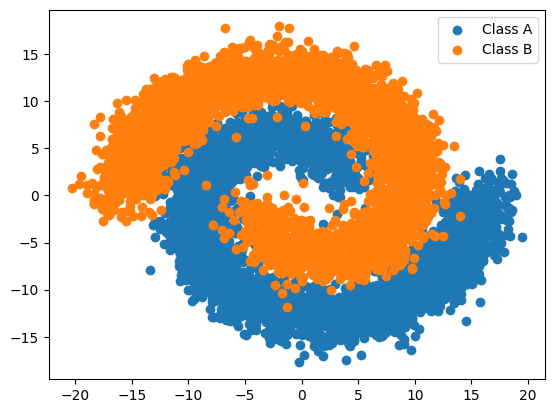

In [3]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt



N = 4000

theta = np.sqrt(np.random.rand(N)) * 2 * np.pi


r_a = 2 * theta + np.pi
data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
x_a = data_a + np.random.randn(N, 2) * 1.5


r_b = -2 * theta - np.pi
data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T
x_b = data_b + np.random.randn(N, 2) * 1.5


res_a = np.append(x_a, np.zeros((N, 1)), axis=1)
res_b = np.append(x_b, np.ones((N, 1)), axis=1)


res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)


np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')


plt.scatter(x_a[:, 0], x_a[:, 1], label='Class A')
plt.scatter(x_b[:, 0], x_b[:, 1], label='Class B')
plt.legend()
plt.savefig('spiral dataset.png')

plt.show()


Epoch 1/50
160/160 [==============================] - 3s 4ms/step - loss: 0.4518 - accuracy: 0.7404 - val_loss: 0.3969 - val_accuracy: 0.7750
Epoch 2/50
160/160 [==============================] - 0s 3ms/step - loss: 0.3672 - accuracy: 0.7926 - val_loss: 0.2843 - val_accuracy: 0.8453
Epoch 3/50
160/160 [==============================] - 0s 3ms/step - loss: 0.2312 - accuracy: 0.9127 - val_loss: 0.1482 - val_accuracy: 0.9609
Epoch 4/50
160/160 [==============================] - 0s 3ms/step - loss: 0.1298 - accuracy: 0.9643 - val_loss: 0.1008 - val_accuracy: 0.9773
Epoch 5/50
160/160 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9727 - val_loss: 0.0741 - val_accuracy: 0.9742
Epoch 6/50
160/160 [==============================] - 0s 3ms/step - loss: 0.0850 - accuracy: 0.9715 - val_loss: 0.0766 - val_accuracy: 0.9727
Epoch 7/50
160/160 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9742 - val_loss: 0.0708 - val_accuracy: 0.9734
Epoch 

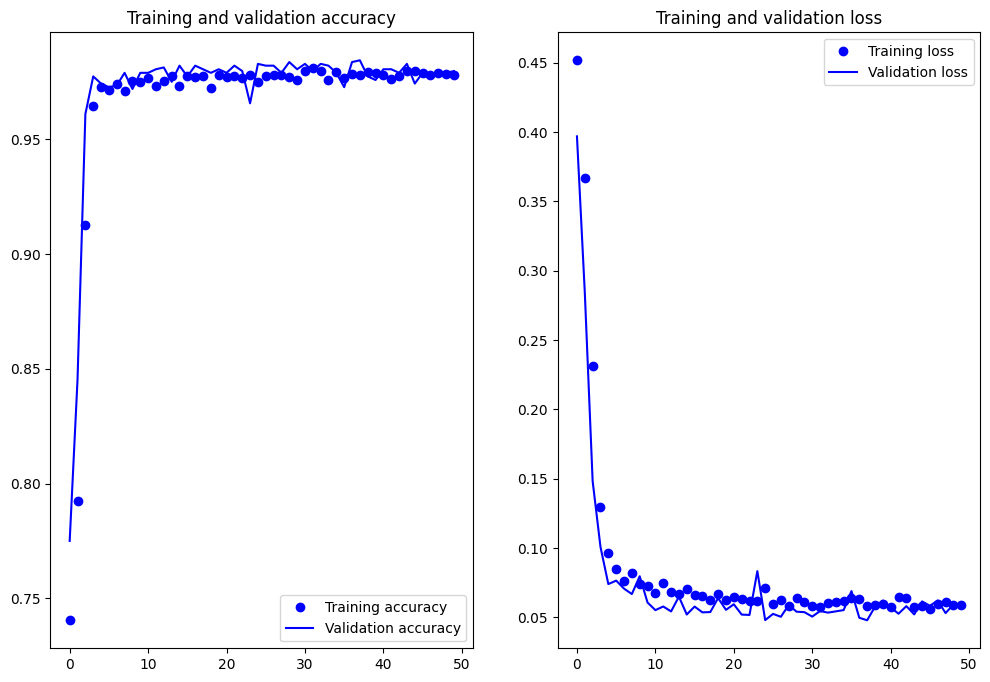

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam



X = res[:, :2]
y = res[:, 2].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Dense(128, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.savefig('training_history - neural network.pdf')

    plt.show()

plot_training_history(history)


SVM with linear kernel:
Training Accuracy: 0.7422
Test Accuracy: 0.7444

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       759
           1       0.77      0.73      0.75       841

    accuracy                           0.74      1600
   macro avg       0.74      0.75      0.74      1600
weighted avg       0.75      0.74      0.74      1600



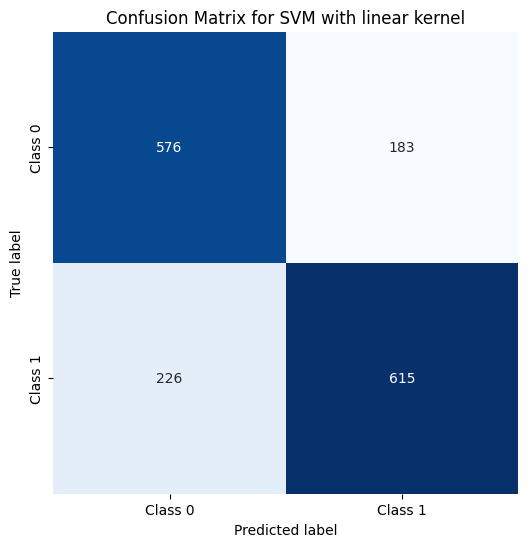

SVM with rbf kernel:
Training Accuracy: 0.9706
Test Accuracy: 0.9762

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       759
           1       0.98      0.98      0.98       841

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



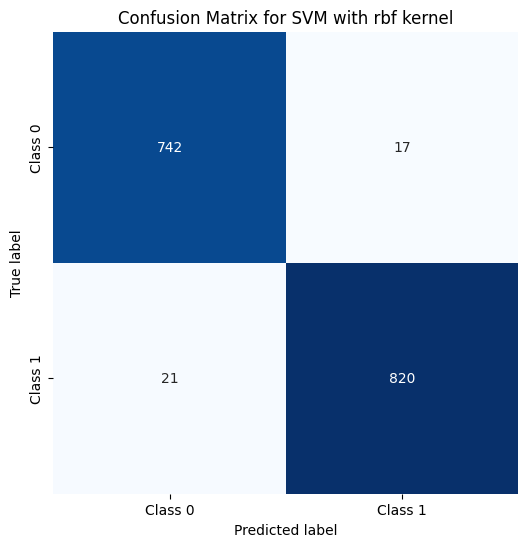

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, title, filename):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(filename)
    plt.show()



from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




def train_and_evaluate_svm(X_train, y_train, X_test, y_test, kernel, kernel_name):
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)

    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"SVM with {kernel_name} kernel:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("\nClassification Report on Test Data:")
    print(classification_report(y_test, y_test_pred))

    cm = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(cm, classes=['Class 0', 'Class 1'],
                          title=f'Confusion Matrix for SVM with {kernel_name} kernel',
                          filename=f'confusion_matrix_svm_{kernel_name}.pdf')


train_and_evaluate_svm(X_train, y_train, X_test, y_test, 'linear', 'linear')


train_and_evaluate_svm(X_train, y_train, X_test, y_test, 'rbf', 'rbf')


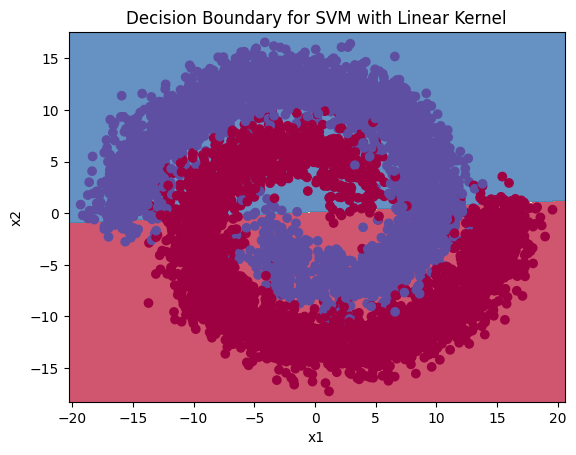

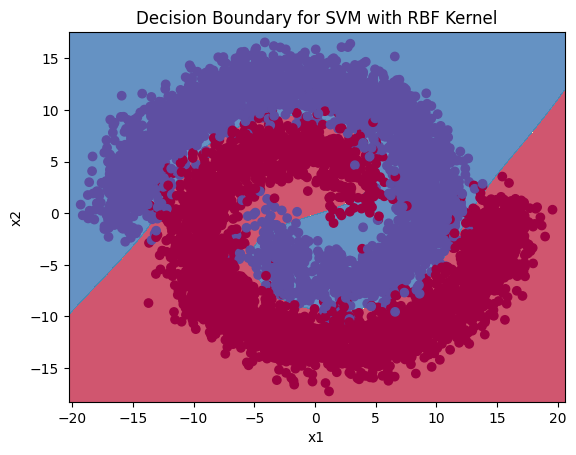

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, title):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.savefig('decision_boundary.pdf')
    plt.show()


svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
plot_decision_boundary(svm_linear, X_train, y_train, "Decision Boundary for SVM with Linear Kernel")


svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
plot_decision_boundary(svm_rbf, X_train, y_train, "Decision Boundary for SVM with RBF Kernel")




k-NN with k=1:
Training Accuracy: 1.0000
Test Accuracy: 0.9731

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       759
           1       0.97      0.98      0.97       841

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



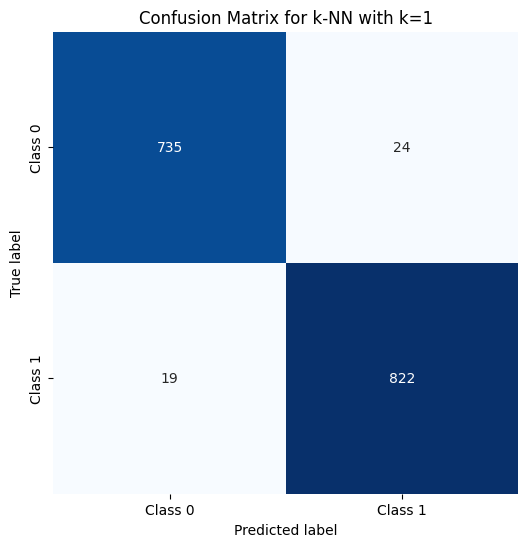

k-NN with k=3:
Training Accuracy: 0.9844
Test Accuracy: 0.9781

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       759
           1       0.98      0.98      0.98       841

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



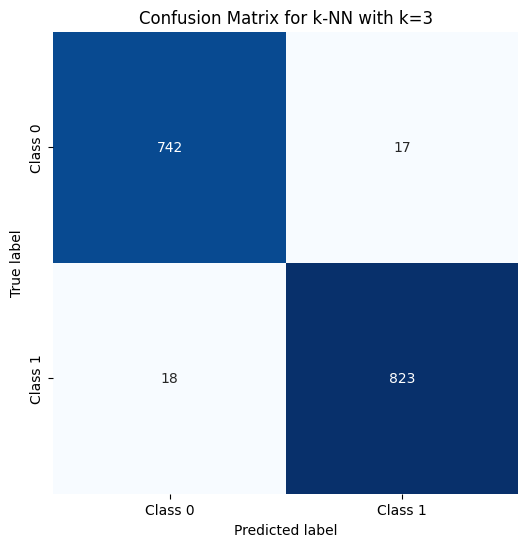

k-NN with k=5:
Training Accuracy: 0.9831
Test Accuracy: 0.9838

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       759
           1       0.98      0.99      0.98       841

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



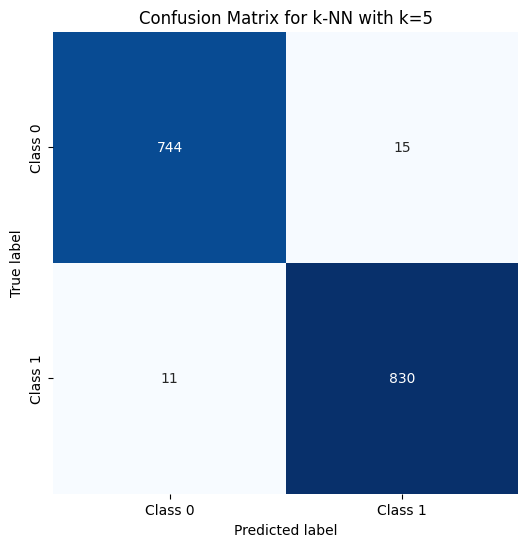

k-NN with k=10:
Training Accuracy: 0.9788
Test Accuracy: 0.9844

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       759
           1       0.99      0.98      0.99       841

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



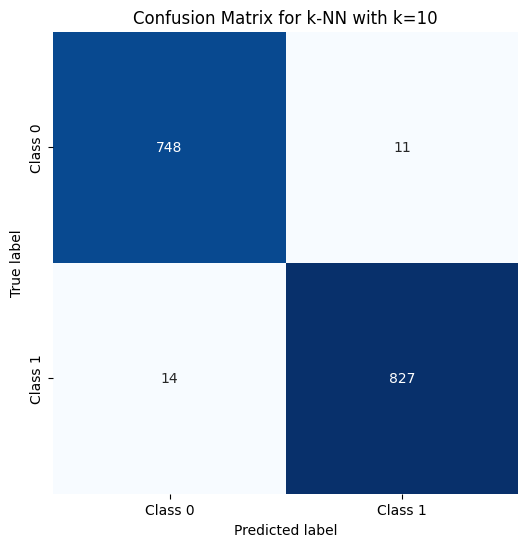

k-NN with k=20:
Training Accuracy: 0.9784
Test Accuracy: 0.9862

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       759
           1       0.99      0.99      0.99       841

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



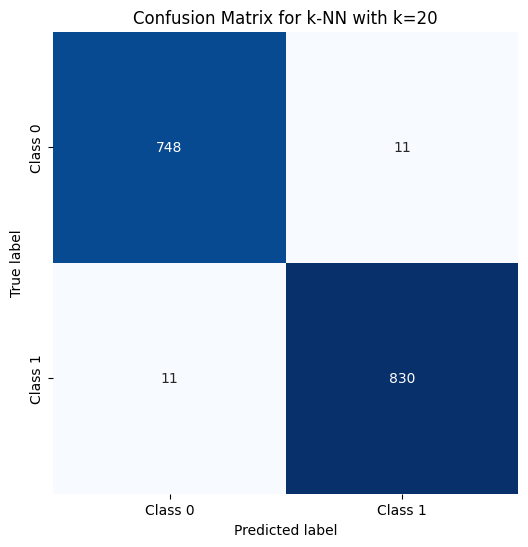

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

from sklearn.neighbors import KNeighborsClassifier


def train_and_evaluate_knn(X_train, y_train, X_test, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)



    print(f"k-NN with k={k}:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("\nClassification Report on Test Data:")
    print(classification_report(y_test, y_test_pred))

    cm = confusion_matrix(y_test, y_test_pred)
    plot_confusion_matrix(cm, classes=['Class 0', 'Class 1'], title=f'Confusion Matrix for k-NN with k={k}')



k_values = [1, 3, 5, 10, 20]
for k in k_values:
    train_and_evaluate_knn(X_train, y_train, X_test, y_test, k)



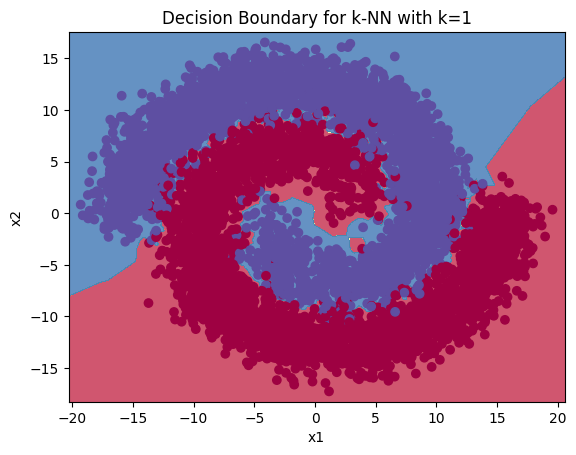

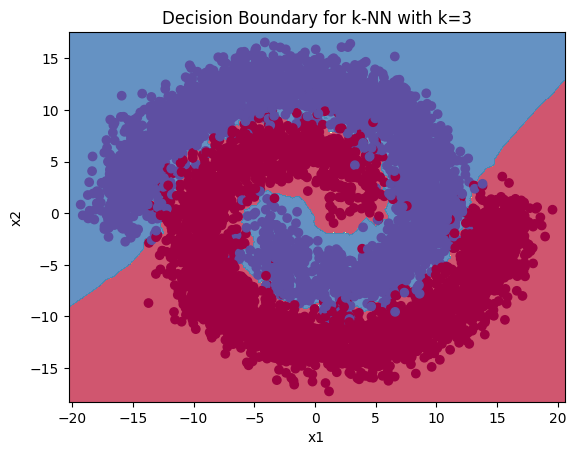

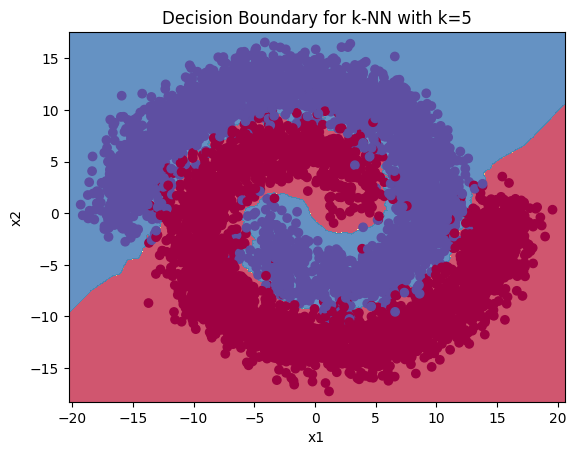

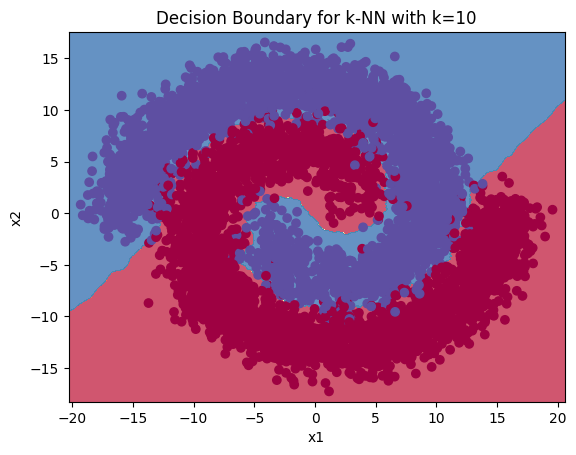

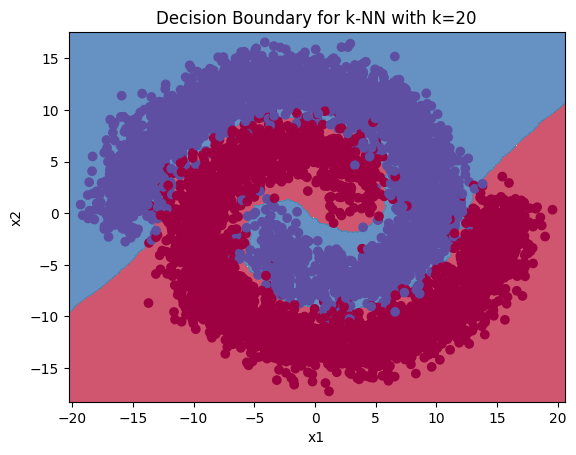

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, title):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))



    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_decision_boundary(knn, X_train, y_train, f"Decision Boundary for k-NN with k={k}")
